In [35]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [36]:
# define cols to load
part = 100000
ds = pd.read_csv('out.csv')
ds = ds.dropna()
ds = ds[0:part]

X_train = ds[0:50000].values
X_test = ds[50000:part].values

In [37]:
X_train[0:10]

array([[  0.,   0.,   0., 319.],
       [  0.,   1.,   1., 308.],
       [  0.,   1.,   2., 210.],
       [  0.,   1.,   3., 233.],
       [  0.,   2.,   4., 172.],
       [  0.,   0.,   0., 522.],
       [  0.,   1.,   5., 342.],
       [  0.,   1.,   6., 255.],
       [  0.,   2.,   7., 297.],
       [  0.,   0.,   8., 256.]])

In [49]:
def trainGmm(ds):
    gm = GaussianMixture(n_components=3, random_state=0).fit(ds)
    labels = gm.fit_predict(ds)
    # getting unique labels
    u_labels = np.unique(labels)

    # plotting the results:
    for i in u_labels:
        plt.scatter(ds[labels == i , 2], ds[labels == i , 3], label = i)
    plt.legend()
    plt.show()
    
def testGmm(ds):
    records = gm.predict_proba(ds)
    guaiaca = []
    for item in records:
        guaiaca.append(np.argmax(item))
    print(np.histogram(guaiaca, bins=3))
    print(gm.score(ds))

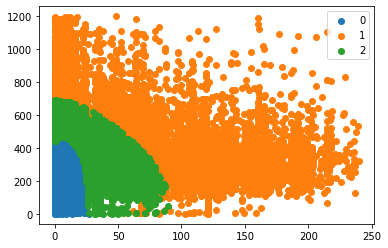

In [50]:
trainGmm(X_train)

In [51]:
testGmm(X_test)

(array([25561,  8474, 15965]), array([0.        , 0.66666667, 1.33333333, 2.        ]))
-23.232782709364578


In [59]:
gm.predict_proba([X_test[5]])

array([[0.04942779, 0.16485199, 0.78572022]])

In [57]:
labels[5]

2